# Multi-Label Classification using Codeforces Platform 

CodeForce is a Programming language Competitive platform where Questions are posted, usually its quite challenging to come up with an approach for solving looking at the description. So, tagging for questions is essential for a better user experience. In this machine learning problem, the final goal is to predict the tag based on the Question's textual description, abbreviated as 'problem statement'.

<h3>Goal and Objectives:</h3>

1)Conduct Explorary Data Analysis on problem tags to analyse number of tags per question,number of words in tags and number of unigrams and multigrams in the problem statement.

2)Conduct Data Pre-processing on problem statement to convert text data to lower case,remove unicode characters , html tags,stop words removal,lemma and stemming.

3)Run and compare various Machine Learning algorithms(Multi-label Logistic Regression,Multi-label Random Forest Classifier and Bilstm with Embedding layer(DL algorithm))by performing hyper-parameter tuning to calculate precision,recall,f1-score,hamming-loss.



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#Read the csv to dataframe.
df = pd.read_csv("data.csv")
df.head()

,contest,problem_name,problem_statement,problem_tags
0,325,A,You are given n rectangles. The corners of rec...,"implementation,*1500"
1,325,B,Daniel is organizing a football tournament. He...,"binarysearch,math,*1800"
2,325,C,Piegirl has found a monster and a book about m...,"dfsandsimilar,graphs,shortestpaths,*2600"
3,325,D,"In a far away land, there exists a planet shap...","dsu,*2900"
4,325,E,Piegirl found the red button. You have one las...,"combinatorics,dfsandsimilar,dsu,graphs,greedy,..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8343 entries, 0 to 8342
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   contest            8343 non-null   int64 
 1   problem_name       8343 non-null   object
 2   problem_statement  8336 non-null   object
 3   problem_tags       8279 non-null   object
dtypes: int64(1), object(3)
memory usage: 260.8+ KB


<h3>Observation:</h3>
<p>There are total of 5 columns</p>

In [6]:
df.isnull().sum()

contest               0
problem_name          0
problem_statement     7
problem_tags         64
dtype: int64

In [7]:
#Separate problem difficulty from the problem tags , has prblem difficulty is not considered for tag analysis
s=df['problem_tags'].str.split(',').str[-1]
difficult_values=s.str.isnumeric()
count=0
for val in difficult_values:
    if(val):
        count+=1
        df['problem_difficulty']=df['problem_tags'].str.split(',').str[-1]
        df["problem_difficulty"] = df["problem_difficulty"].apply(lambda x:str(x)[1:])
        df['problem_tags_values']=df['problem_tags'].str.split(',').str[:-1]    
print(count)
df.head()

64


,contest,problem_name,problem_statement,problem_tags,problem_difficulty,problem_tags_values
0,325,A,You are given n rectangles. The corners of rec...,"implementation,*1500",1500,[implementation]
1,325,B,Daniel is organizing a football tournament. He...,"binarysearch,math,*1800",1800,"[binarysearch, math]"
2,325,C,Piegirl has found a monster and a book about m...,"dfsandsimilar,graphs,shortestpaths,*2600",2600,"[dfsandsimilar, graphs, shortestpaths]"
3,325,D,"In a far away land, there exists a planet shap...","dsu,*2900",2900,[dsu]
4,325,E,Piegirl found the red button. You have one las...,"combinatorics,dfsandsimilar,dsu,graphs,greedy,...",2800,"[combinatorics, dfsandsimilar, dsu, graphs, gr..."


In [8]:
erow_indices_to_drop = [ x for x in list(range(df.shape[0])) if df["problem_tags_values"].iloc[x] == []]

In [9]:
df["problem_tags_values"].describe()
row_indices_to_drop = [ x for x in list(range(df.shape[0])) if df["problem_tags_values"].iloc[x] == []]

In [10]:
#Drop the empty values with empty  problem tags
df = df.drop(row_indices_to_drop)

In [11]:
df["problem_tags_values"].describe()
df.head()

,contest,problem_name,problem_statement,problem_tags,problem_difficulty,problem_tags_values
0,325,A,You are given n rectangles. The corners of rec...,"implementation,*1500",1500,[implementation]
1,325,B,Daniel is organizing a football tournament. He...,"binarysearch,math,*1800",1800,"[binarysearch, math]"
2,325,C,Piegirl has found a monster and a book about m...,"dfsandsimilar,graphs,shortestpaths,*2600",2600,"[dfsandsimilar, graphs, shortestpaths]"
3,325,D,"In a far away land, there exists a planet shap...","dsu,*2900",2900,[dsu]
4,325,E,Piegirl found the red button. You have one las...,"combinatorics,dfsandsimilar,dsu,graphs,greedy,...",2800,"[combinatorics, dfsandsimilar, dsu, graphs, gr..."


In [12]:
#Drop the missing values from dataframe
df = df.dropna()

In [13]:
#Calculate number of problem tags in the dataset
tags_dict = {}
for allTags in df["problem_tags_values"]:
    for tag in allTags :
        if tag not in tags_dict:
            tags_dict[tag] = 0 
        tags_dict[tag] += 1 

tags_dict_sorted = dict(sorted(tags_dict.items(), key = lambda x: x[1], reverse = True))
tag_count = {"Tag":list(tags_dict_sorted.keys()), "Count": list(tags_dict_sorted.values())}
count_df = pd.DataFrame(data = tag_count)
count_df[:10]

,Tag,Count
0,implementation,2199
1,math,1989
2,greedy,1943
3,dp,1668
4,datastructures,1284
5,constructivealgorithms,1176
6,bruteforce,1168
7,graphs,893
8,binarysearch,785
9,sortings,750


In [14]:
tags_dict = {}
for allTags in df["problem_tags_values"]:
    for tag in allTags :
        if tag not in tags_dict:
            tags_dict[tag] = 0 
        tags_dict[tag] += 1 

tags_dict_sorted = dict(sorted(tags_dict.items(), key = lambda x: x[1], reverse = True))
tag_count = {"Tag":list(tags_dict_sorted.keys()), "Count": list(tags_dict_sorted.values())}
count_df = pd.DataFrame(data = tag_count)
total_tags=count_df.Tag

Text(0.5, 1.0, 'Top 20 Highest occurring Tags')

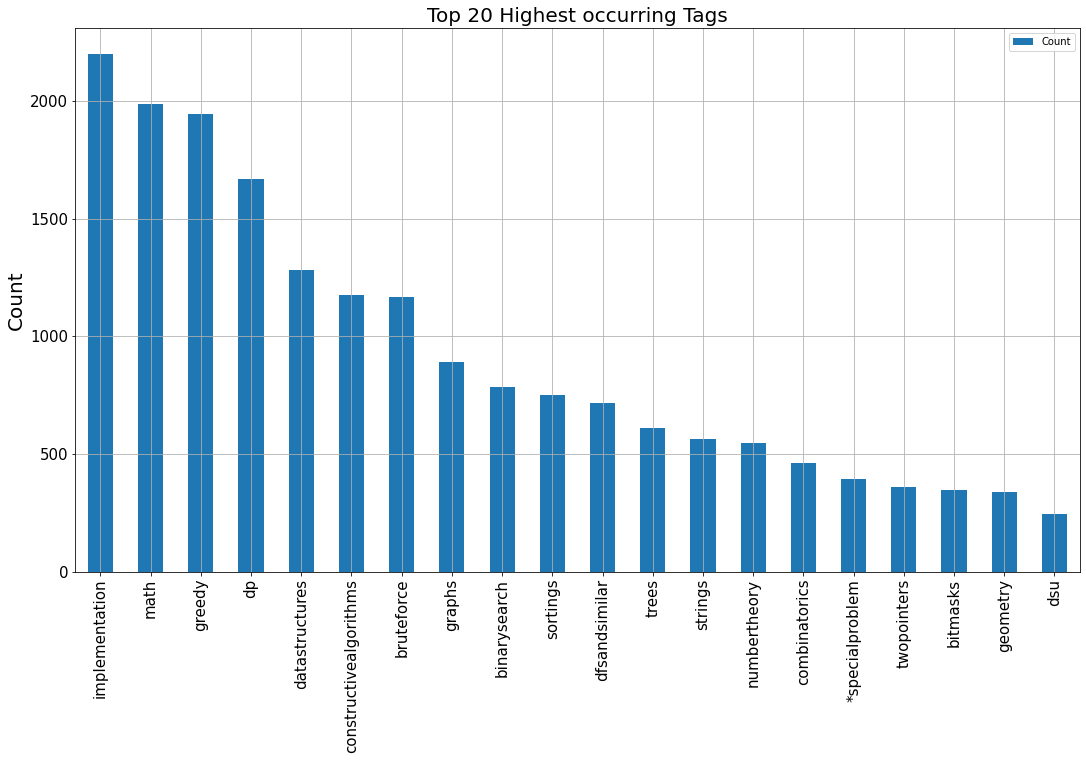

In [15]:
axes = count_df.head(20).plot(x = 'Tag', y = 'Count', kind = 'bar', figsize = (18, 10), fontsize = 15, grid = True)
plt.xlabel("")
plt.ylabel("Count", fontsize = 20)
plt.title("Top 20 Highest occurring Tags", fontsize = 20)

<h3> Observations:</h3>
<p> Majority of the most frequent tags are implementation and maths tags</p>

In [16]:
#Converting the dataframe column to string value.
df["problem_tags_values"] = df["problem_tags_values"].apply(lambda x:" ".join(x))

In [17]:
df.isnull().sum()


contest                0
problem_name           0
problem_statement      0
problem_tags           0
problem_difficulty     0
problem_tags_values    0
dtype: int64

<h3>Observation:</h3>
<p>From the above we can conclude that null values are removed from the dataframe.</p>

In [18]:
#Drop the column problem_tags as they are segregated into separate columns.
df = df.drop('problem_tags', 1)

In [19]:
# Check if there are duplicate data points in the Problem statement.
df2=df.groupby(df.columns.tolist(),as_index=False).size()

In [20]:
df2

,contest,problem_name,problem_statement,problem_difficulty,problem_tags_values,size
0,1,A,Theatre Square in the capital city of Berland ...,1000,math,1
1,1,B,In the popular spreadsheets systems (for examp...,1600,implementation math,1
2,1,C,Nowadays all circuses in Berland have a round ...,2100,geometry math,1
3,2,A,The winner of the card game popular in Berland...,1500,hashing implementation,1
4,2,B,"There is a square matrix n × n, consisting of ...",2000,dp math,1
...,...,...,...,...,...,...
7837,1549,C,"There are $$$n$$$ nobles, numbered from $$$1$$...",reedy,graphs,1
7838,1549,D,British mathematician John Littlewood once sai...,wopointers,binarysearch datastructures math,1
7839,1549,E,Three little pigs from all over the world are ...,ath,combinatorics dp fft,1
7840,1549,F1,This is the easy version of the problem. The o...,umbertheory,geometry,1


In [21]:
df2.groupby('size').count()

,contest,problem_name,problem_statement,problem_difficulty,problem_tags_values
size,,,,,
1,7842,7842,7842,7842,7842


<h3>Observation: </h3>
<p>No Duplicate data points that is denoted by the value in 1.</p>

In [22]:
# Calculate the number of tags per Question which is denoted by 'tags_count'
df['tags_count'] = [len(i.split(" ")) for i in df["problem_tags_values"] ]
df

,contest,problem_name,problem_statement,problem_difficulty,problem_tags_values,tags_count
0,325,A,You are given n rectangles. The corners of rec...,1500,implementation,1
1,325,B,Daniel is organizing a football tournament. He...,1800,binarysearch math,2
2,325,C,Piegirl has found a monster and a book about m...,2600,dfsandsimilar graphs shortestpaths,3
3,325,D,"In a far away land, there exists a planet shap...",2900,dsu,1
4,325,E,Piegirl found the red button. You have one las...,2800,combinatorics dfsandsimilar dsu graphs greedy,5
...,...,...,...,...,...,...
8338,1271,B,There are $$$n$$$ blocks arranged in a row and...,1300,greedy math,2
8339,1271,C,The map of the capital of Berland can be viewe...,1300,bruteforce geometry greedy implementation,4
8340,1271,D,"You play a strategic video game (yeah, we ran ...",2100,datastructures dp greedy implementation sortings,5
8341,1271,E,"At first, let's define function $$$f(x)$$$ as ...",2100,binarysearch combinatorics dp math,4


In [23]:
#Find the maximum, minimum and mean tags per question.
min_tag_count = df["tags_count"].min()
max_tag_count = df["tags_count"].max()
avg_tag_count = df["tags_count"].mean()
meadian_tag_count = df["tags_count"].median()

print("Maximum tags per question:" + str(max_tag_count))
print("Minimum tags per question:" + str(min_tag_count))
print("Mean tags per question:" + str(avg_tag_count))
print("Median tags per question:" + str(meadian_tag_count))

Maximum tags per question:11
Minimum tags per question:1
Mean tags per question:2.561463912267279
Median tags per question:2.0


In [24]:
df['tags_count'].value_counts()

2     2533
3     1992
1     1709
4      994
5      401
6      157
7       39
8       15
9        1
11       1
Name: tags_count, dtype: int64

   <h3>Observations:</h3>
<ul>1.Maximum number of tags per question: 11 </ul>
<ul>2.Minimum number of tags per question: 1 </ul>
<ul>3.Avg. number of tags per question: 2.561 </ul>
<ul>4.Most of the questions are having 2 or 3 tags </ul>

<h3>Plot to show number of words in the Tags</h3>

In [25]:

tag_word_count=[len(list(tags_dict_sorted.keys())[list(tags_dict_sorted.keys()).index(index)]) for index in list(tags_dict_sorted.keys())]
tags=list(tags_dict_sorted.keys())


Text(0, 0.5, 'Count of words in the Tags')

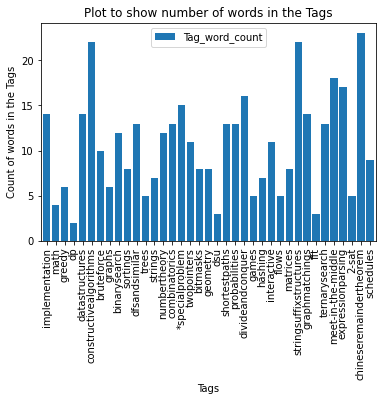

In [26]:
d = {'Tag_word_count': tag_word_count, 'Tags': tags}
df_tag_word_count = pd.DataFrame(data=d)
df_tag_word_count

plot_tags=df_tag_word_count.plot(kind="bar",x='Tags', width=0.8)
plt.title('Plot to show number of words in the Tags')
plt.xlabel('Tags')
plt.ylabel('Count of words in the Tags')

<h3>Bi-gram and Multi-gram Analysis for Problem Tags</h3>

In [27]:
count_multigrams=0
count_datapoints=0

tag_value_list=df.problem_tags_values

for i in tag_value_list:
    for j, x in enumerate(i.split()):
        a=i.split()
        count_datapoints+=1
        if(len(a)>1):
            count_multigrams+=1
print("Total tokenized words:",count_datapoints)
print("Number of unigrams in the dataset are:",count_datapoints-count_multigrams)
print("Number of Multigrams in the dataset are:",count_multigrams)

Total tokenized words: 20087
Number of unigrams in the dataset are: 1709
Number of Multigrams in the dataset are: 18378


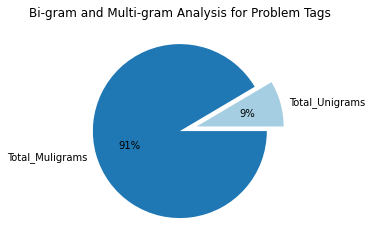

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [count_datapoints-count_multigrams,count_multigrams]
labels = ['Total_Unigrams', 'Total_Muligrams']

my_explode=[0.2,0]
colors = sns.color_palette('Paired')
         
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',explode=my_explode)
plt.title('Bi-gram and Multi-gram Analysis for Problem Tags')
plt.show()

In [30]:
#Problem Statement example to show it is not yet pre-processed
print("Problem Statement example to show it is not yet pre-processed:")
df.problem_statement[17]

Problem Statement example to show it is not yet pre-processed:


'There are n lamps in a line. The lamps are numbered 1 to n from left to right. There are also n keys. When key number i is pressed, all lamps number x such that i|x change their state.\n\nFor two integer numbers a and b, we say a|b if and only if there exists an integer c such that a\u2009×\u2009c\u2009=\u2009b.\n\nAmirali likes to play with the keys. He randomly pressed k keys and wants to know the final state of the lamps. Help him by writing a Pike piece of code to solve this task.\n\nThe first line of input contains a single integer n, the number of lamps (1\u2009≤\u2009n\u2009≤\u2009105).\n\nThe following line contains n words. The i-th word describes the initial state of lamp number i (see samples for details).\n\nThe following line contains a single integer k (1\u2009≤\u2009k\u2009≤\u2009104), the number of times a key is pressed. Then in the next line come k integers in range [1,\u2009n] which are the numbers of the pressed keys.\n\nWrite n words to output. Describe the final 

<h3>Data Preprocessing for the questions</h3>
<p> </p>

In [31]:
import re

df_processed=df

#replace all the \n in the text
problem_stat_processed = df_processed.problem_statement.replace(r'\n',' ', regex=True) 

#convert to lower case
problem_stat_processed=problem_stat_processed.str.lower()

#Remove unicodes 
problem_stat_processed=[re.sub('\s[\$\s]+\w*[\$\s]+', '', item.encode('ascii', 'ignore').decode('ascii')) for item in problem_stat_processed ]
CLEANR = re.compile('<.*?>') 
re_pattern = re.compile(u'[^\u2009-\uD7FF\uE000-\uFFFF]', re.UNICODE)

#html tags removal
problem_stat_processed=[re.sub(CLEANR, ' ', str(item)) for item in problem_stat_processed ]

print("Pre-processed problem statment:")
problem_stat_processed[17]


Pre-processed problem statment:


'there are n lamps in a line. the lamps are numbered 1 to n from left to right. there are also n keys. when key number i is pressed, all lamps number x such that i|x change their state.two integer numbers a and b, we say a|b if and only if there exists an integer c such that ac=b.likes to play with the keys. he randomly pressed k keys and wants to know the final state of the lamps. help him by writing a pike piece of code to solve this task.first line of input contains a single integer n, the number of lamps (1n105).following line contains n words. the i-th word describes the initial state of lamp number i (see samples for details).following line contains a single integer k (1k104), the number of times a key is pressed. then in the next line come k integers in range [1,n] which are the numbers of the pressed keys.n words to output. describe the final state of the lamps. see samples for more details.'

In [32]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amitk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amitk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
 import nltk
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amitk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
a=problem_stat_processed
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS

#stop words removal.
problem_stat_processed = [" ".join([word for word in word_tokenize(sentence) if word not in STOP_WORDS]) for sentence in a]
                                                        

In [36]:
print("Pre-processed problem statment after stop words removal:")
problem_stat_processed[17]

Pre-processed problem statment after stop words removal:


'n lamps line . lamps numbered 1 n left right . n keys . key number pressed , lamps number x i|x change state.two integer numbers b , a|b exists integer c ac=b.likes play keys . randomly pressed k keys wants know final state lamps . help writing pike piece code solve task.first line input contains single integer n , number lamps ( 1n105 ) .following line contains n words . i-th word describes initial state lamp number ( samples details ) .following line contains single integer k ( 1k104 ) , number times key pressed . line come k integers range [ 1 , n ] numbers pressed keys.n words output . describe final state lamps . samples details .'

In [37]:
#Lemmatanization
import nltk
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

text_problem=problem_stat_processed
problem_stat_processed = [" ".join([lemmatizer.lemmatize(word) for word in word_tokenize(sentence) ]) for sentence in text_problem]

In [38]:
print("Pre-processed problem statment after Lemmatanization:")
problem_stat_processed[17]

Pre-processed problem statment after Lemmatanization:


'n lamp line . lamp numbered 1 n left right . n key . key number pressed , lamp number x i|x change state.two integer number b , a|b exists integer c ac=b.likes play key . randomly pressed k key want know final state lamp . help writing pike piece code solve task.first line input contains single integer n , number lamp ( 1n105 ) .following line contains n word . i-th word describes initial state lamp number ( sample detail ) .following line contains single integer k ( 1k104 ) , number time key pressed . line come k integer range [ 1 , n ] number pressed keys.n word output . describe final state lamp . sample detail .'

In [39]:
#Stemming

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
text_problem=problem_stat_processed
problem_stat_processed = [" ".join([ps.stem(word) for word in word_tokenize(sentence) ]) for sentence in text_problem]

In [40]:
print("Pre-processed problem statment after Stemming:")
problem_stat_processed[17]

Pre-processed problem statment after Stemming:


'n lamp line . lamp number 1 n left right . n key . key number press , lamp number x i|x chang state.two integ number b , a|b exist integ c ac=b.lik play key . randomli press k key want know final state lamp . help write pike piec code solv task.first line input contain singl integ n , number lamp ( 1n105 ) .follow line contain n word . i-th word describ initi state lamp number ( sampl detail ) .follow line contain singl integ k ( 1k104 ) , number time key press . line come k integ rang [ 1 , n ] number press keys.n word output . describ final state lamp . sampl detail .'

In [41]:
#Setting back to dataframe the pre-processing text
df.problem_statement=problem_stat_processed

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

#Converting tags to multi-label
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multi_tags = vectorizer.fit_transform(df.problem_tags_values)
print("Total number of tags in the dataset:",multi_tags.shape[1])

Total number of tags in the dataset: 37


In [43]:
import re
def clean_data(row):
    return re.sub('\s[\$\s]+\w*[\$\s]+', '', row.encode('ascii', 'ignore').decode('ascii'))

df['problem_statement'] = df['problem_statement'].apply(clean_data)

**Bag of Words**
Featurizing bag of words with text vectorizer

In [44]:
from sklearn.model_selection import train_test_split

X = df[['problem_statement']]
y = df[["problem_tags_values"]]

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6273, 1), (1569, 1), (6273, 1), (1569, 1))

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Vectorizing the Inputs.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
x_train_multilabel = vectorizer.fit_transform(X_train['problem_statement'])
x_test_multilabel = vectorizer.transform(X_test['problem_statement'])

y_train = vectorizer.fit_transform(y_train['problem_tags_values'])
y_test = vectorizer.fit_transform(y_test['problem_tags_values'])


In [46]:
print("Train data diemnsions are :",x_train_multilabel.shape, "Y :",y_train.shape)
print("Test data dimensions are :",x_test_multilabel.shape,"Y:",y_test.shape)

Train data diemnsions are : (6273, 55519) Y : (6273, 37)
Test data dimensions are : (1569, 55519) Y: (1569, 37)


<h3>Logistic Regression with OnevsRestClassifier Model</h3>

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_fscore_support as score

#LogisticRegression for multi-label classification.
classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l2',solver='sag', max_iter=1000))
classifier_2.fit(x_train_multilabel, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel)

print("Accuracy of the Logistic Regression is:",metrics.accuracy_score(y_test, predictions_2))
print("Hamming loss of the Logistic Regression is",metrics.hamming_loss(y_test,predictions_2))

precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average scores")
print("Precision are : {:.4f}, Recall are : {:.4f}, F1-measure are : {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average scores")
print("Precision are : {:.4f}, Recall are: {:.4f}, F1-measure are: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_2))


Accuracy of the Logistic Regression is: 0.12938177182919056
Hamming loss of the Logistic Regression is 0.05879110468020602
Micro-average scores
Precision are : 0.6094, Recall are : 0.3974, F1-measure are : 0.4811
Macro-average scores
Precision are : 0.6183, Recall are: 0.3261, F1-measure are: 0.4048
              precision    recall  f1-score   support

           0       0.76      0.40      0.52        85
           1       0.00      0.00      0.00         2
           2       0.56      0.27      0.36       153
           3       0.50      0.16      0.25        61
           4       0.33      0.18      0.23       228
           5       1.00      0.67      0.80         3
           6       0.65      0.38      0.48        91
           7       0.57      0.36      0.45       223
           8       0.71      0.47      0.56       277
           9       0.51      0.42      0.46       136
          10       0.17      0.03      0.05        38
          11       0.62      0.38      0.47       

Hyper parameters tuning for OneVsRestClassifier(Logistic Regression)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Hyper paramter tuning for best accuracy.
param_grid = dict(estimator__C=[1, 1.2], estimator__penalty = ['l1', 'l2'], estimator__solver = ['liblinear', 'sag'])
gsv = GridSearchCV(OneVsRestClassifier(LogisticRegression(class_weight='balanced')), param_grid=param_grid, verbose=5, n_jobs=-1)
gsv.fit(x_train_multilabel, y_train)

print('Hyper parameters are  ', gsv.best_params_)
print('Best Score values are ', gsv.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Hyper parameters are   {'estimator__C': 1.2, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}
Best Score values are  0.09468994834060886


In [51]:
classifier = OneVsRestClassifier(LogisticRegression(C=1.2, solver='liblinear', penalty='l2'))
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict (x_test_multilabel)

print("Accuracy after hyper-parameter tuning is :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss after hyper-parameter tuning ",metrics.hamming_loss(y_test,predictions))

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average score after tuning")
print("Precision are: {:.4f}, Recall are: {:.4f}, F1-measure are: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average score after tuning")
print("Precision are: {:.4f}, Recall are: {:.4f}, F1-measure  are: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))

Accuracy after hyper-parameter tuning is : 0.12810707456978968
Hamming loss after hyper-parameter tuning  0.058877232873408784
Micro-average score after tuning
Precision are: 0.6074, Recall are: 0.3999, F1-measure are: 0.4823
Macro-average score after tuning
Precision are: 0.6171, Recall are: 0.3282, F1-measure  are: 0.4056
              precision    recall  f1-score   support

           0       0.76      0.40      0.52        85
           1       0.00      0.00      0.00         2
           2       0.56      0.27      0.36       153
           3       0.50      0.16      0.25        61
           4       0.33      0.18      0.24       228
           5       1.00      0.67      0.80         3
           6       0.65      0.38      0.48        91
           7       0.57      0.37      0.45       223
           8       0.71      0.47      0.56       277
           9       0.51      0.42      0.46       136
          10       0.17      0.03      0.05        38
          11       0.62  

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Printing multi-label confusion matrix .
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("CM-" + class_label)

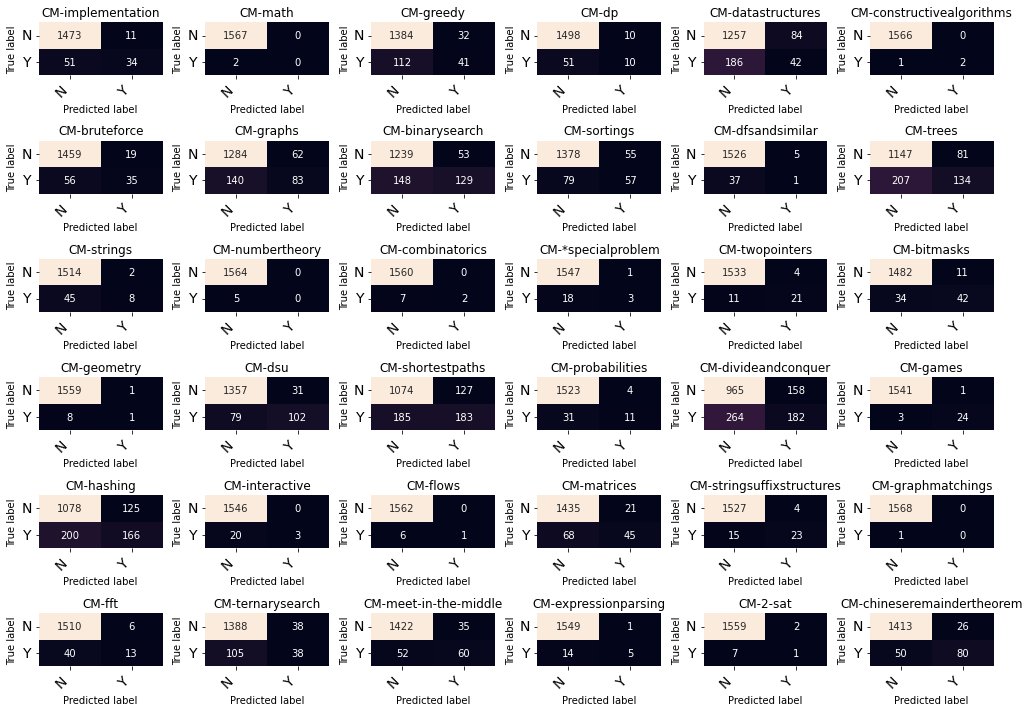

In [53]:
#Logistic-Regression
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns

labels=total_tags.astype(str).values.tolist()
cfs_matrix=multilabel_confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(6, 6, figsize=(14, 10))
for axes, cfs_matrix, label in zip(ax.flatten(), cfs_matrix, labels):
  print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"]) 
fig.tight_layout()
plt.show()

**Multi-label Confusion matrix for Logistic Regression**

The above plot shows the confusin matrix for multi-label classification and we can see that false positive values are quite large . 

**SGDClassifier for Multi-label Classification**

In [54]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_fscore_support as score

#Linear SVM
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions_sdg = classifier.predict(x_test_multilabel)

print("Accuracy of the SGD Classifier is:",metrics.accuracy_score(y_test, predictions_sdg))
print("Hamming loss of the SGD Classifier is",metrics.hamming_loss(y_test, predictions_sdg))

precision = precision_score(y_test, predictions_sdg, average='micro')
recall = recall_score(y_test, predictions_sdg, average='micro')
f1 = f1_score(y_test, predictions_sdg, average='micro')
 
print("Micro-average scores")
print("Precision are : {:.4f}, Recall are : {:.4f}, F1-measure are : {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_sdg, average='macro')
recall = recall_score(y_test, predictions_sdg, average='macro')
f1 = f1_score(y_test, predictions_sdg, average='macro')
 
print("Macro-average scores")
print("Precision are : {:.4f}, Recall are: {:.4f}, F1-measure are: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_sdg))

Accuracy of the SGD Classifier is: 0.11918419375398343
Hamming loss of the SGD Classifier is 0.06633593440476805
Micro-average scores
Precision are : 0.5192, Recall are : 0.4413, F1-measure are : 0.4771
Macro-average scores
Precision are : 0.5239, Recall are: 0.3558, F1-measure are: 0.4050
              precision    recall  f1-score   support

           0       0.63      0.42      0.51        85
           1       0.00      0.00      0.00         2
           2       0.47      0.33      0.38       153
           3       0.42      0.21      0.28        61
           4       0.27      0.26      0.27       228
           5       1.00      0.67      0.80         3
           6       0.58      0.38      0.46        91
           7       0.48      0.42      0.45       223
           8       0.61      0.50      0.55       277
           9       0.46      0.51      0.48       136
          10       0.12      0.05      0.07        38
          11       0.54      0.44      0.48       341
      

In [55]:
# Hyper paramter tuning for best accuracy.
param_grid = dict(estimator__alpha=[0.001, 0.01], estimator__penalty=['l1', 'l2', 'elasticnet'])
gsv = GridSearchCV(OneVsRestClassifier(SGDClassifier()), param_grid=param_grid, verbose=5, n_jobs=-1)
gsv.fit(x_train_multilabel, y_train)

print('Hyper parameters are  ', gsv.best_params_)
print('Best Score values are ', gsv.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Hyper parameters are   {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
Best Score values are  0.10760377945951441


In [56]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_fscore_support as score

classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.001, penalty='l2'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions_sdg = classifier.predict(x_test_multilabel)

print("Accuracy of the SGD Classifier is:",metrics.accuracy_score(y_test, predictions_sdg))
print("Hamming loss of the SGD Classifier is",metrics.hamming_loss(y_test, predictions_sdg))

precision = precision_score(y_test, predictions_sdg, average='micro')
recall = recall_score(y_test, predictions_sdg, average='micro')
f1 = f1_score(y_test, predictions_sdg, average='micro')
 
print("Micro-average scores")
print("Precision are : {:.4f}, Recall are : {:.4f}, F1-measure are : {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_sdg, average='macro')
recall = recall_score(y_test, predictions_sdg, average='macro')
f1 = f1_score(y_test, predictions_sdg, average='macro')
 
print("Macro-average scores")
print("Precision are : {:.4f}, Recall are: {:.4f}, F1-measure are: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_sdg))

Accuracy of the SGD Classifier is: 0.12045889101338432
Hamming loss of the SGD Classifier is 0.06373486297004462
Micro-average scores
Precision are : 0.5457, Recall are : 0.4218, F1-measure are : 0.4758
Macro-average scores
Precision are : 0.5561, Recall are: 0.3506, F1-measure are: 0.4055
              precision    recall  f1-score   support

           0       0.63      0.47      0.54        85
           1       0.00      0.00      0.00         2
           2       0.31      0.44      0.36       153
           3       0.58      0.11      0.19        61
           4       0.31      0.24      0.27       228
           5       1.00      0.67      0.80         3
           6       0.57      0.34      0.43        91
           7       0.54      0.39      0.45       223
           8       0.68      0.47      0.55       277
           9       0.40      0.51      0.45       136
          10       0.06      0.03      0.04        38
          11       0.64      0.37      0.47       341
      

**Random Forest Classifier for Multi-label Classification**

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier()

#Random forest classifier model
rfc_clf = OneVsRestClassifier(rfc_classifier)
rfc_clf.fit(x_train_multilabel, y_train)

rfc_predictions = rfc_clf.predict(x_test_multilabel)

print("Accuracy of the Random forest Classifier is:",metrics.accuracy_score(y_test, rfc_predictions))
rf_hamming_loss=metrics.hamming_loss(y_test, rfc_predictions)
print("Hamming loss of the Random forest Classifier is",rf_hamming_loss)

precision_rf = precision_score(y_test, rfc_predictions, average='micro')
recall_rf = recall_score(y_test, rfc_predictions, average='micro')
f1_rf = f1_score(y_test, rfc_predictions, average='micro')
 
print("Micro-average scores")
print("Precision are : {:.4f}, Recall are : {:.4f}, F1-measure are : {:.4f}".format(precision_rf, recall_rf, f1_rf))

precision_rf_macro = precision_score(y_test, rfc_predictions, average='macro')
recall_rf_macro = recall_score(y_test, rfc_predictions, average='macro')
f1_rf_macro = f1_score(y_test, rfc_predictions, average='macro')
 
print("Macro-average scores")
print("Precision are : {:.4f}, Recall are: {:.4f}, F1-measure are: {:.4f}".format(precision_rf_macro, recall_rf_macro, f1_rf_macro))

print (metrics.classification_report(y_test, rfc_predictions))

Accuracy of the Random forest Classifier is: 0.08731676226896112
Hamming loss of the Random forest Classifier is 0.059101166175735964
Micro-average scores
Precision are : 0.7387, Recall are : 0.2138, F1-measure are : 0.3316
Macro-average scores
Precision are : 0.6788, Recall are: 0.2136, F1-measure are: 0.3164
              precision    recall  f1-score   support

           0       0.77      0.35      0.48        85
           1       0.00      0.00      0.00         2
           2       0.69      0.22      0.34       153
           3       0.58      0.11      0.19        61
           4       0.51      0.14      0.21       228
           5       1.00      0.67      0.80         3
           6       0.70      0.21      0.32        91
           7       0.73      0.21      0.33       223
           8       0.84      0.20      0.33       277
           9       0.62      0.21      0.31       136
          10       0.17      0.03      0.05        38
          11       0.84      0.22      

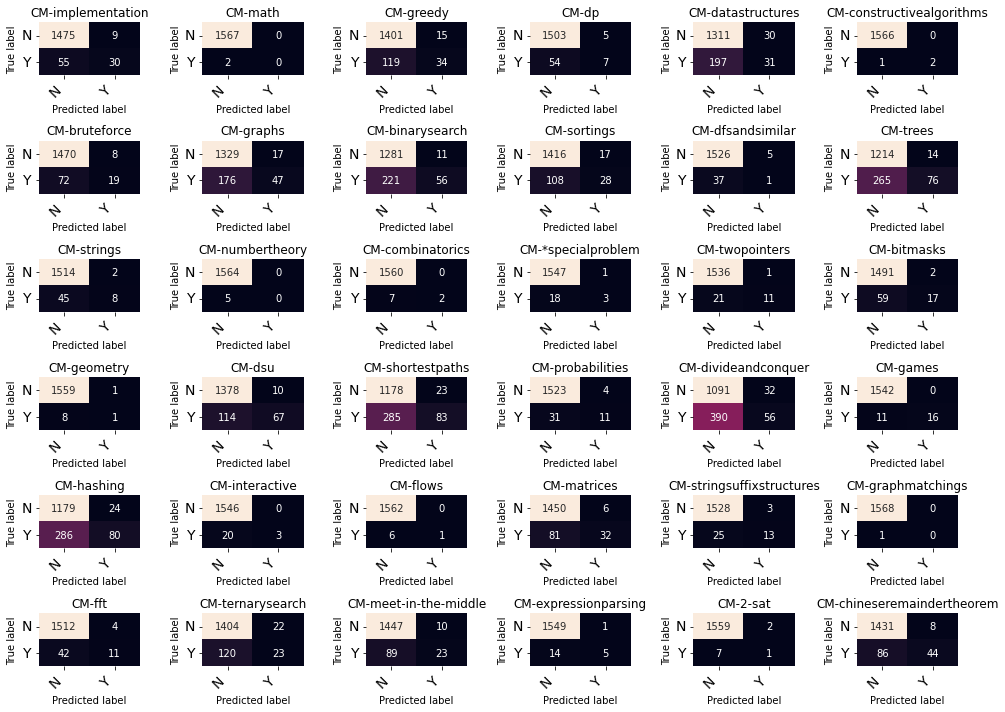

In [52]:
#Random forest Classifier
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns

labels=total_tags.astype(str).values.tolist()
cfs_matrix=multilabel_confusion_matrix(y_test, rfc_predictions)
fig, ax = plt.subplots(6, 6, figsize=(14, 10))
for axes, cfs_matrix, label in zip(ax.flatten(), cfs_matrix, labels):
  print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"]) 
fig.tight_layout()
plt.show()

**Bi-LSTM model for multi-label classification**

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer

#Tokenize the x_train values
title_encoder = Tokenizer(oov_token="<ukn>")
title_encoder.fit_on_texts(X_train['problem_statement'].values)
train_titles = title_encoder.texts_to_sequences(X_train['problem_statement'].values)
test_titles = title_encoder.texts_to_sequences(X_test['problem_statement'].values)

In [54]:
len(title_encoder.word_index)

28525

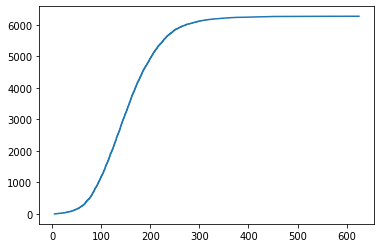

In [55]:
lens = [len(x) for x in train_titles]
plt.plot(sorted(lens), list(range(len(lens))))

We can see a peak at 250 so we set as padding length.

In [56]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_titles = pad_sequences(train_titles,maxlen=250)
test_titles = pad_sequences(test_titles,maxlen=250)

In [ ]:
# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
import tensorflow.keras as keras
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding


# get the model
def get_model(n_inputs, n_outputs):

  bilstm = tf.keras.Sequential()
  bilstm.add(tf.keras.layers.Embedding(input_dim = 28525+1,output_dim = 100,input_length=250))
  bilstm.add(tf.keras.layers.Bidirectional(LSTM(100, dropout=0.25,return_sequences=False)))
  bilstm.add(tf.keras.layers.Dense(20,input_dim=n_inputs, activation='relu'))
  bilstm.add(tf.keras.layers.Dense(37, activation='sigmoid'))
  bilstm.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
  return bilstm

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y,n_input,n_output):
  results=list()
  model = get_model(n_input, n_output)
  model.fit(X, y, verbose=1, epochs=100, batch_size=10)
  yhat=model.predict(test_titles)
  return yhat


n_input=x_train_multilabel.shape[1]
n_output=y_train.shape[1]
train_x = x_train_multilabel.toarray()
train_y = y_train.toarray()
validation_x = x_test_multilabel.toarray()
validation_y = y_test.toarray()

# evaluate model
yhat=evaluate_model(train_titles, y_train.toarray(),n_input,n_output)
yhat[yhat>0.5] = 1
yhat[yhat<=0.5] = 0
print(metrics.classification_report(y_test, yhat))

Epoch 1/100
628/628 [==============================] - 18s 24ms/step - loss: 0.3156 - accuracy: 0.0443
Epoch 2/100
628/628 [==============================] - 15s 24ms/step - loss: 0.2135 - accuracy: 0.0861
Epoch 3/100
628/628 [==============================] - 15s 24ms/step - loss: 0.2119 - accuracy: 0.0862
Epoch 4/100
628/628 [==============================] - 15s 24ms/step - loss: 0.2114 - accuracy: 0.0867
Epoch 5/100
628/628 [==============================] - 15s 24ms/step - loss: 0.2110 - accuracy: 0.0850
Epoch 6/100
628/628 [==============================] - 15s 24ms/step - loss: 0.2109 - accuracy: 0.0861
Epoch 7/100
628/628 [==============================] - 15s 24ms/step - loss: 0.2104 - accuracy: 0.0944
Epoch 8/100
628/628 [==============================] - 15s 24ms/step - loss: 0.2090 - accuracy: 0.0942
Epoch 9/100
628/628 [==============================] - 15s 24ms/step - loss: 0.2062 - accuracy: 0.1025
Epoch 10/100
628/628 [==============================] - 15s 24ms/step - l

In [57]:
 # mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
import tensorflow.keras as keras
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding


# get the model
def get_model(n_inputs, n_outputs):

  bilstm = tf.keras.Sequential()
  bilstm.add(tf.keras.layers.Embedding(input_dim = 28525+1,output_dim = 100,input_length=250))
  bilstm.add(tf.keras.layers.Bidirectional(LSTM(100, dropout=0.25,return_sequences=False)))
  bilstm.add(tf.keras.layers.Dense(20,input_dim=n_inputs, activation='relu'))
  bilstm.add(tf.keras.layers.Dense(37, activation='sigmoid'))
  bilstm.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
  return bilstm

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y,n_input,n_output):
  results=list()
  model = get_model(n_input, n_output)
  model.fit(X, y, verbose=1, epochs=50, batch_size=1)
  yhat=model.predict(test_titles)
  return yhat


n_input=x_train_multilabel.shape[1]
n_output=y_train.shape[1]
train_x = x_train_multilabel.toarray()
train_y = y_train.toarray()
validation_x = x_test_multilabel.toarray()
validation_y = y_test.toarray()

# evaluate model
yhat=evaluate_model(train_titles, y_train.toarray(),n_input,n_output)
yhat[yhat>0.5] = 1
yhat[yhat<=0.5] = 0
print(metrics.classification_report(y_test, yhat))

Epoch 1/50
6273/6273 [==============================] - 111s 17ms/step - loss: 0.2429 - accuracy: 0.0744
Epoch 2/50
6273/6273 [==============================] - 104s 17ms/step - loss: 0.2112 - accuracy: 0.0800
Epoch 3/50
6273/6273 [==============================] - 104s 17ms/step - loss: 0.2093 - accuracy: 0.0861
Epoch 4/50
6273/6273 [==============================] - 103s 16ms/step - loss: 0.2057 - accuracy: 0.0958
Epoch 5/50
6273/6273 [==============================] - 104s 17ms/step - loss: 0.2006 - accuracy: 0.1036
Epoch 6/50
6273/6273 [==============================] - 104s 17ms/step - loss: 0.1959 - accuracy: 0.1121
Epoch 7/50
6273/6273 [==============================] - 104s 17ms/step - loss: 0.1911 - accuracy: 0.1200
Epoch 8/50
6273/6273 [==============================] - 104s 17ms/step - loss: 0.1867 - accuracy: 0.1278
Epoch 9/50
6273/6273 [==============================] - 103s 16ms/step - loss: 0.1821 - accuracy: 0.1275
Epoch 10/50
6273/6273 [==============================] 

In [59]:

#Classification and Performance Metric Calculation.
print("Accuracy of the Bilstm is:",metrics.accuracy_score(y_test, yhat))
print("Hamming loss of the Bilstm is",metrics.hamming_loss(y_test,yhat))

precision_bilstm = precision_score(y_test, yhat, average='micro')
recall_bilstm = recall_score(y_test, yhat, average='micro')
f1_bisltm = f1_score(y_test, yhat, average='micro')
hamming_bilstm=metrics.hamming_loss(y_test,yhat)
 
print("Micro-average scores")
print("Precision are : {:.4f}, Recall are : {:.4f}, F1-measure are : {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, yhat, average='macro')
recall = recall_score(y_test, yhat, average='macro')
f1 = f1_score(y_test, yhat, average='macro')
 
print("Macro-average scores")
print("Precision are : {:.4f}, Recall are: {:.4f}, F1-measure are: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, yhat))

Accuracy of the Bilstm is: 0.08030592734225621
Hamming loss of the Bilstm is 0.07670576886638072
Micro-average scores
Precision are : 0.3564, Recall are : 0.2451, F1-measure are : 0.2720
Macro-average scores
Precision are : 0.3564, Recall are: 0.2451, F1-measure are: 0.2720
              precision    recall  f1-score   support

           0       0.54      0.31      0.39        85
           1       0.00      0.00      0.00         2
           2       0.23      0.24      0.23       153
           3       0.09      0.07      0.08        61
           4       0.22      0.25      0.23       228
           5       0.00      0.00      0.00         3
           6       0.48      0.32      0.38        91
           7       0.38      0.30      0.34       223
           8       0.46      0.43      0.45       277
           9       0.47      0.38      0.42       136
          10       0.10      0.03      0.04        38
          11       0.41      0.45      0.43       341
          12       0.1

**Observation**
Bilstm model gave a f1 score 0.40 even with batch_size=1 and epochs=50. This is due to overfitting.


**Future Work**

For better f1 score values we can implement the SentenceTransformers as a future work. It works well with image and text embeddings

**Performance Metrics**

In [59]:
 from tabulate import tabulate

 print("Performance Metrics\n")
 d = [[1,"Logistic-Regression", round(precision_score(y_test, predictions, average='micro'),3), round(recall_score(y_test, predictions, average='micro'),3),round(f1_score(y_test, predictions, average='micro'),3),round(metrics.hamming_loss(y_test,predictions),3)],
     [2,"Random Forest Classifier", round(precision_rf ,3), round(recall_rf ,3),round(f1_rf,3),round(rf_hamming_loss,3)],
     [3,"Bidirectional-lstm",round(precision_bilstm ,3),round(recall_bilstm ,3),round(f1_bisltm ,3),round(hamming_bilstm,3)],
     [4,"SGDClassifier",round(precision_score(y_test, predictions_sdg, average='micro'),3), round(recall_score(y_test, predictions_sdg, average='micro'),3),round(f1_score(y_test, predictions_sdg, average='micro'),3),round(metrics.hamming_loss(y_test,predictions_sdg),3)]]
     
print(tabulate(d, headers=['Sl-no','Algorithm','Precision','Recall','Micro-f1score','Hamming-loss']))

Performance Metrics

  Sl-no  Algorithm                   Precision    Recall    Micro-f1score    Hamming-loss
-------  ------------------------  -----------  --------  ---------------  --------------
      1  Logistic-Regression             0.607     0.4              0.482           0.059
      2  Random Forest Classifier        0.739     0.214            0.332           0.059
      3  Bidirectional-lstm              0.431     0.371            0.398           0.077
      4  SGDClassifier                   0.546     0.422            0.476           0.064


**Model Performance Conclusion**

From the above table we can see that Logistic Regression has the best f1-score compared to random forest regressor and lstm . This may be due to small dataset size and also overfitting. Techniques like oversampling or undersampling can be applied to make the dataset with various tags more balanced. As the dataset is small , machine learning model is performing better than deep learning model. 

However, Bert can be used to improve the f1-score further.
